#### [work1] 타이타닉 생존자 비율 구하기
##### [work1-1] 생존자의 성별 비율 시각화

사용 컬럼 : survived, sex  
각 성별의 생존율 막대그래프를 통해 시각화  
생존 남성 숫자/전체 생존 숫자  
생존 여성 숫자/전체 생존 숫자

In [36]:
# [1] 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
# [2] 자료 준비
file_name=r'C:\Users\KDP-17\EX_PANDAS6\data\titanic.csv'

In [38]:
# [3] xlsx => DF
dataDF=pd.read_csv(file_name)
dataDF

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [39]:
# [4] 필요 데이터 출력 및 전처리
dataDF=dataDF[['survived','sex']]
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   survived  891 non-null    int64 
 1   sex       891 non-null    object
dtypes: int64(1), object(1)
memory usage: 14.0+ KB


In [40]:
# - nan값 확인
dataDF.isna().sum()

survived    0
sex         0
dtype: int64

In [41]:
# [5]생존자 숫자 구하기
# - 살아남은 숫자 구하기
# - 전체 생존 숫자 : 342
# - 여성 생존 숫자 : 233
# - 남성 생존 숫자 : 109
suvobj=dataDF.groupby('sex')
suvobj.sum()



,survived
sex,
female,233
male,109


In [42]:
# 생존 비율 구하기
suvobj.sum()/342

,survived
sex,
female,0.681287
male,0.318713


In [43]:
suvobj.count()

,survived
sex,
female,314
male,577


### 연령별 생존율 구하기

사용컬럼 : survived, age  

In [44]:
# [3] csv => DF
dataDF=pd.read_csv(file_name)
dataDF.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [45]:
# [4] 필요 데이터 출력 및 전처리
# - 결측치 확인 및 처리
dataDF=dataDF[['survived','age']]
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   age       714 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 14.0 KB


In [46]:
# - 결측치 처리
dataDF=dataDF.dropna()

In [47]:
# [5] 연령 구간 나누기 .cut()
ages=['유아','10대','20대','30대','40대','50대 이상']
cut_bins=[0,19,29,39,49,59,105]
dataDF['age']=pd.cut(x=dataDF['age'],right=True,bins=cut_bins,labels=ages)

In [48]:
dataDF.head(10)

,survived,age
0,0,10대
1,1,20대
2,1,10대
3,1,20대
4,0,20대
6,0,40대
7,0,유아
8,1,10대
9,1,유아
10,1,유아


In [49]:
# [6] 연령별 생존 비율 구하기
suvobj=dataDF.groupby('age')
suvobj.sum()/suvobj.count()

C:\Users\KDP-17\AppData\Local\Temp\ipykernel_9052\1670697059.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  suvobj=dataDF.groupby('age')


,survived
age,
유아,0.481707
10대,0.350000
20대,0.437126
30대,0.382022
40대,0.416667
50대 이상,0.269231


In [50]:
# 폰트 적용
# 한글 폰트 설정 => 폰트 매니저 모듈 사용
from matplotlib import font_manager as fm
from matplotlib import rc

# 적용할 폰트 파일
font_file = r'C:\Windows\Fonts\malgun.ttf'

# 폰트 패밀리 이름 가져오기
font_name=fm.FontProperties(fname=font_file).get_name()

# 새로운 폰트 패밀리 이름 지정
rc('font',family=font_name)

In [51]:
# [6] 시각화 하기
sex=['female','male']
survived_sex=[0.68,0.31]
bar_labels_sex=['female','male']
bar_colors_sex=['tab:red','tab:blue']

age=['유아','10대','20대','30대','40대','50대 이상']
survived_age=[0.48,0.35,0.43,0.38,0.41,0.26]
bar_labels_age=['유아','10대','20대','30대','40대','50대 이상']
bar_colors_age=['tab:red','tab:blue','tab:green','Tab:red','tab:blue','tab:orange']



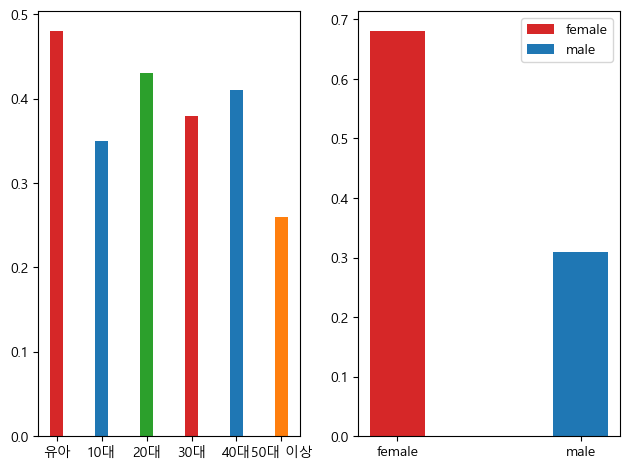

In [52]:
fig=plt.figure()
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.bar(age,survived_age,width=0.3,color=bar_colors_age,label=bar_labels_age)
ax2.bar(sex,survived_sex,width=0.3,color=bar_colors_sex,label=bar_labels_sex )
plt.tight_layout()
plt.legend()
plt.show()